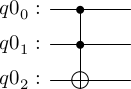

In [1]:
from qiskit import QuantumRegister, QuantumCircuit
reg = QuantumRegister(3)
circuit = QuantumCircuit(reg)
circuit.ccx(reg[0], reg[1], reg[2])
display(circuit.draw('latex'))

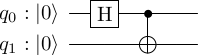

In [2]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(2)
circ.h(0)
circ.cnot(0, 1)
display(circ.draw('latex', initial_state=True))

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


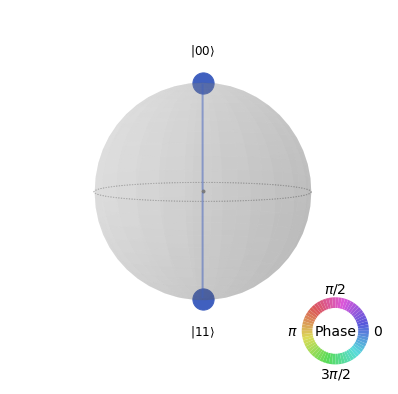

In [3]:
from qiskit.quantum_info import Statevector

vector = Statevector.from_label('00')
vector = vector.evolve(circ)
display(vector.draw(output='qsphere'))

In [4]:
display(vector.draw(output='latex'))

<IPython.core.display.Latex object>

{'00': 478, '11': 522}


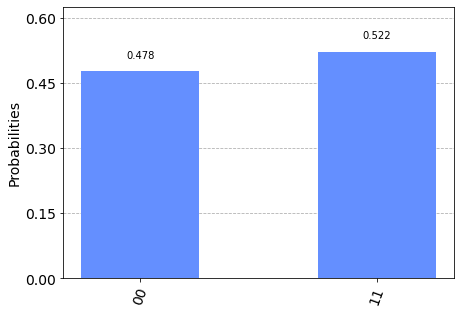

In [5]:
circ.measure_all()

from qiskit import IBMQ, execute 
from qiskit.visualization import plot_histogram

provider = IBMQ.load_account()
device = provider.get_backend('ibmq_qasm_simulator')
job = execute(circ, backend=device, shots=1000)

counts = job.result().get_counts(circ)
print(counts)
plot_histogram(counts)

In [6]:
from qiskit import QuantumCircuit


def get_circuit(angle_left, angle_right):
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.cnot(0, 1)
    circ.x(1)
    circ.barrier()
    circ.ry(angle_left, 0)
    circ.ry(angle_right, 1)
    circ.measure_all()
    display(circ.draw('latex'))
    return circ

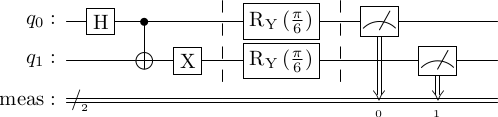

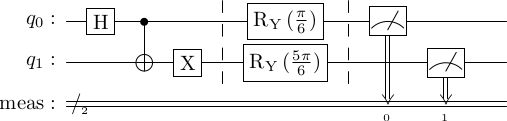

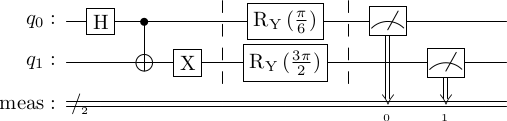

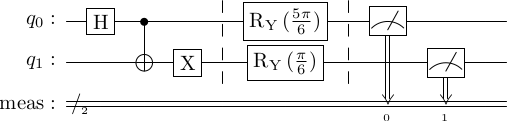

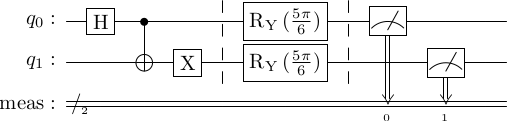

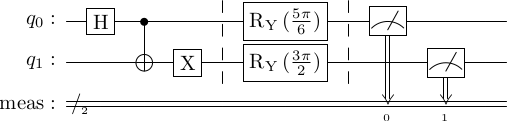

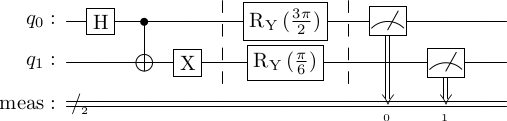

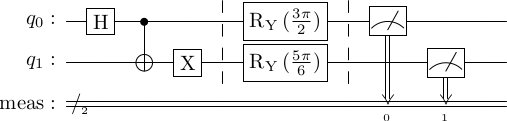

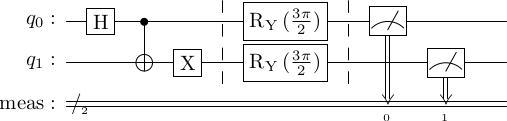

In [7]:
from math import pi

northwest = pi / 6
southwest = 5 * pi / 6
east = 9 * pi / 6
directions = [northwest, southwest, east]

circuits = []
for dir_left in directions:
    for dir_right in directions:
        circuits.append(get_circuit(dir_left, dir_right))

In [8]:
from qiskit import IBMQ, execute

provider = IBMQ.load_account()
device = provider.get_backend('ibmq_manila')
# For a real test, run on a quantum backend  
#     with at least two qubits

shots=100
job = \
   execute(circuits, backend=device, shots=shots, memory=True)
result = job.result()

ibmqfactory.load_account:WARNING:2022-10-09 00:26:20,275: Credentials are already in use. The existing account in the session will be replaced.


In [10]:
disagree = 0
for circ in circuits:
    memory = result.get_memory(circ)
    for meas in memory:
        if meas[0] != meas[1]:
            disagree += 1
print('\nProbability of disagreement: ', end='')
print(disagree / (9 * shots))


Probability of disagreement: 0.5
